<a href="https://colab.research.google.com/github/colbyendres/PaperRec/blob/separate_colab/CSCE670FPipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA COLLECTION

In [ ]:
import os
import glob # Import the glob module
import tarfile
import gzip
import re
import pandas as pd
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Adjust the path if your folder is under a different directory.
drive_folder = "/content/drive/MyDrive/arxiv_pdf/arxiv_source"

# ----------------------------------------------------------------------
# Define a helper function to extract title and abstract from LaTeX content.
def extract_title_and_abstract(latex_content):
    """
    Extracts title and abstract from LaTeX content.

    Assumes:
      - Title is defined with \title{...}
      - Abstract is within \begin{abstract} ... \end{abstract}
    """
    title_match = re.search(r'\\title\s*\{(.+?)\}', latex_content, re.DOTALL)
    title = title_match.group(1).strip() if title_match else None

    abstract_match = re.search(r'\\begin\{abstract\}(.*?)\\end\{abstract\}', latex_content, re.DOTALL)
    abstract = abstract_match.group(1).strip() if abstract_match else None

    return title, abstract

# Process each .gz file: open using tarfile (r:gz mode) and extract the first .tex file.
paper_data = []  # List to hold dictionaries with extracted data
gz_files = sorted(glob.glob(os.path.join(drive_folder, "*.gz")))

i = 0
for gz_file in gz_files:
    drive_info = os.path.basename(gz_file)
    content = ""
    try:
        try:
            # Attempt to open as a tar archive.
            with tarfile.open(gz_file, "r:gz") as tar:
                # Find all members ending with '.tex'
                tex_members = [member for member in tar.getmembers() if member.name.endswith('.tex')]
                if tex_members:
                    member = tex_members[0]
                    f = tar.extractfile(member)
                    if f is not None:
                        content = f.read().decode('utf-8', errors='ignore')
                    else:
                        raise Exception("Failed to extract .tex file from tar archive.")
                else:
                    raise Exception("No .tex file found in tar archive.")
        except (tarfile.ReadError, Exception) as e:
            # If reading as a tar archive fails, fall back to plain gzip.
            print(f"Tar archive read error for {gz_file}: {e}. Trying to open as a plain gzip file.")
            with gzip.open(gz_file, "rt", encoding="utf-8", errors="ignore") as f:
                content = f.read()

        # Extract title and abstract from the content.
        title, abstract = extract_title_and_abstract(content)
        if title is None:
            title = "No title found"
        if abstract is None:
            abstract = "No abstract found"

        paper_data.append({
            'title': title,
            'abstract': abstract,
            'drive_file': drive_info
        })
    except Exception as e:
        print(f"Error processing {gz_file}: {e}")
        paper_data.append({
            'title': "Error reading file",
            'abstract': "Error reading file",
            'drive_file': drive_info
        })
    i += 1
    if i == 7:
      break

print(f"Extracted data from {len(paper_data)} files.")

# Create a DataFrame from the extracted data.
papers_df = pd.DataFrame(paper_data)
print(papers_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tar archive read error for /content/drive/MyDrive/arxiv_pdf/arxiv_source/arXiv-alg-geom9608018v3.gz: invalid header. Trying to open as a plain gzip file.
Extracted data from 7 files.
                                               title  \
0  Development and Evolution of Neural Networks i...   
1                                     No title found   
2                                     No title found   
3  Rank two bundles on Algebraic Curves and Decod...   
4  Evolutionary design of photometric systems\\an...   

                                            abstract  \
0  We present a model of decentralized growth for...   
1  We examine the evolution of expression pattern...   
2                                  No abstract found   
3                                  No abstract found   
4                                  No abstract found   

              

In [ ]:
root = Path("/content/drive/MyDrive/CSCE670 DATASET")

In [ ]:
from pathlib import Path
import re
import pandas as pd

def looks_like_tex(path: Path, sniff_lines: int = 5) -> bool:
    """
    Read the first few lines and confirm presence of BOTH
    \documentclass and \begin{document}, to cut down false positives.
    """
    try:
        with path.open("r", encoding="utf-8", errors="ignore") as f:
            head = "".join(next(f) for _ in range(sniff_lines))
        return "\\documentclass" in head and "\\begin{document}" in head
    except Exception:
        return False

records = []
i = 0
for p in root.rglob("*"):
    if not p.is_file():
        continue
    ext = p.suffix.lower()
    # 1) always accept real .tex files
    if ext == ".tex":
        is_tex = True
    # 2) sniff only files with NO extension or .txt
    elif ext in {"", ".txt"}:
        is_tex = looks_like_tex(p)
    else:
        is_tex = False

    if not is_tex:
        continue
    print(p.name)
    # extract title & abstract
    text = p.read_text(encoding="utf-8", errors="ignore")
    tm = re.search(r'\\title\s*\{(.+?)\}', text, re.DOTALL)
    title = tm.group(1).strip() if tm else None

    am = re.search(r'\\begin\{abstract\}(.+?)\\end\{abstract\}', text, re.DOTALL)
    abstract = am.group(1).strip() if am else None

    records.append({
        "file_path": str(p),
        "file_name": p.name,
        "directory": str(p.parent),
        "title": title,
        "abstract": abstract,
    })
    i += 1

print(f"length of corpus {i}")
df = pd.DataFrame(records)
print(df)


Streaming output truncated to the last 5000 lines.
Kc.tex
eee.tex
review3a.tex
paper.tex
hgtextM2S.tex
sam2.tex
cslutc.tex
barbosa1.tex
qo3_com_fin.tex
non_degen.tex
s10.tex
s1.tex
l10.tex
physica.tex
l1.tex
vbv10.tex
vbv1.tex
SAW.tex
coll5.tex
paper200297.tex
Ruo.tex
euromacr.tex
deb4.tex
submit.tex
lcmo.tex
nmr.tex
revised.tex
euromacr.tex
text.tex
paperegfig.tex
heat.tex
papefig.tex
ru5.tex
fermion.tex
u5d-prep.tex
QDBMnew.tex
zphys.tex
jphII.tex
IP.tex
CDOCSscfunscfun2.tex
vertexh.tex
hexa.tex
theory.tex
arpes97f19.tex
paper.tex
sud.tex
ijmpb.tex
hubba702.tex
tunnel.tex
zinc.tex
scs1dss.tex
skyrm.tex
jsup97.tex
dimer.tex
fes.tex
paper.tex
pap.tex
pap.tex
paper.tex
fluct.tex
paper.tex
lambda.tex
scale.tex
col5.tex
FS2.tex
paper.tex
f-xy-prb.tex
shen7.tex
text.tex
p3.tex
mn.tex
finalpaper.tex
paper.tex
spec1.tex
kondolattice.tex
hdonner.hole.tex
long.tex
filling.tex
paper_dmf.tex
xray.tex
ssc97.tex
wire.tex
paper.tex
coledge.tex
TIPME.tex
paper.tex
dtdrp.tex
multibann.tex
mloop.tex
F

In [ ]:
for idx, row in df.iterrows():
    print(f"--- Abstract for row {idx} ({row['file_name']}) ---")
    print(row['abstract'])
    print()


Streaming output truncated to the last 5000 lines.
independent searches for the same particle may be combined easily, regardless
of the discriminating variables which may be measured for the candidate events.
The effects of systematic uncertainty in the signal and background models
are incorporated in the confidence levels.
The procedure described allows efficient computation of expected confidence levels.

--- Abstract for row 9951 (br.tex) ---
Problems of the experimental observation of the birefringence of
high energy $\gamma$-quanta propagating in single crystals are discussed.

--- Abstract for row 9952 (phot991.tex) ---
This report on Photon Colliders briefly reviews three main issues:
physics motivation, possible parameters and technical feasibility,
plans of works and international cooperation. New scheme of laser
optics at the interaction region is described which can drastically
(at least by one order) reduce the cost of the laser system.

--- Abstract for row 9953 (binomial.

In [ ]:
# keep only rows where 'abstract' is not null and not just whitespace
mask = df['abstract'].notnull() & df['abstract'].str.strip().astype(bool)
new_df = df.loc[mask].copy()

# verify
print(f"Old df had {len(df)} rows; new df has {len(new_df)} rows.")


Old df had 10688 rows; new df has 5713 rows.


In [ ]:
from google.colab import files
df.to_csv('df.csv', index=False)
files.download('df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ACTUAL STUFF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import re
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
root = Path("/content/drive/MyDrive/CSCE670 DATASET")
records = []

In [ ]:
def looks_like_tex(path, sniff_lines=5):
    try:
        with open(path, "r", encoding="utf-8", errors="ignore") as f:
            head = "".join([next(f) for _ in range(sniff_lines)])
        return "\\documentclass" in head and "\\begin{document}" in head
    except:
        return False

def clean_latex(text):
    text = re.sub(r"\$.*?\$", "", text, flags=re.DOTALL)
    text = re.sub(r"\\\[.*?\\\]", "", text, flags=re.DOTALL)
    text = re.sub(r"\\[A-Za-z]+\{.*?\}", "", text, flags=re.DOTALL)
    text = re.sub(r"\\[A-Za-z]+", "", text)
    return text

def extract_title_abstract(text):
    tm = re.search(r"\\title\s*\{(.+?)\}", text, re.DOTALL)
    title = tm.group(1).strip() if tm else None
    am = re.search(r"\\begin\{abstract\}(.+?)\\end\{abstract\}", text, re.DOTALL)
    abstract = am.group(1).strip() if am else None
    return title, abstract

In [ ]:
for p in root.rglob("*"):
    if not p.is_file():
        continue
    ext = p.suffix.lower()
    if ext == ".tex":
        is_tex = True
    elif ext in {"", ".txt"}:
        is_tex = looks_like_tex(p)
    else:
        is_tex = False
    if not is_tex:
        continue
    raw = p.read_text(encoding="utf-8", errors="ignore")
    title, abstract = extract_title_abstract(raw)
    cleaned = clean_latex(raw)
    records.append({
        "file_path": str(p),
        "title": title or p.stem,
        "abstract": abstract,
        "cleaned": cleaned
    })

df = pd.DataFrame(records)
print("Found", len(df), "TeX papers")

Found 10688 TeX papers


In [ ]:
df1 = df.copy()

from google.colab import drive
import os

# 2) Define your target path (update as needed)
output_dir = "/content/drive/MyDrive/CSCE670 DATASET"
os.makedirs(output_dir, exist_ok=True)
csv_path = f'{output_dir}/tex_papers.csv'
pkl_path = f'{output_dir}/tex_papers.pkl'

# 3) Save DataFrame
df1.to_csv(csv_path, index=False)
df1.to_pickle(pkl_path)

print(f"Saved CSV to: {csv_path}")
print(f"Saved pickle to: {pkl_path}")

Saved CSV to: /content/drive/MyDrive/CSCE670 DATASET/tex_papers.csv
Saved pickle to: /content/drive/MyDrive/CSCE670 DATASET/tex_papers.pkl


DATAFRAME WITH TITLE, INTRO, ABSTRACT, FILENAME SAVED AS Saved CSV to: /content/drive/MyDrive/CSCE670 DATASET/tex_papers.csv
Saved pickle to: /content/drive/MyDrive/CSCE670 DATASET/tex_papers.pkl IN OUR SHARED GOOGLE DRIVE

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("malteos/scincl")
model = AutoModel.from_pretrained("malteos/scincl").to(device)
model.eval()

#https://aclanthology.org/2022.emnlp-main.802.pdf

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/227k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31090, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
embeddings = []
batch_size = 8

for i in range(0, len(df), batch_size):
    texts = df["cleaned"].iloc[i : i + batch_size].tolist()
    inputs = tokenizer(texts, truncation=True, padding=True,
                       return_tensors="pt", max_length=512).to(device)
    with torch.no_grad():
        out = model(**inputs)
        hidden = out.last_hidden_state
        mask = inputs.attention_mask.unsqueeze(-1)
        summed = (hidden * mask).sum(1)
        counts = mask.sum(1)
        emb_batch = (summed / counts).cpu().numpy()
    embeddings.extend(emb_batch)

X = np.vstack(embeddings)
print("Embedding matrix shape:", X.shape)

Embedding matrix shape: (10688, 768)


In [ ]:
pca = PCA(n_components=0.80, random_state=42)
X_pca = pca.fit_transform(X)
print("PCA reduced to:", X_pca.shape)

PCA reduced to: (10688, 40)


EXPERIMENTED WITH DIFFERENT VARIANCES

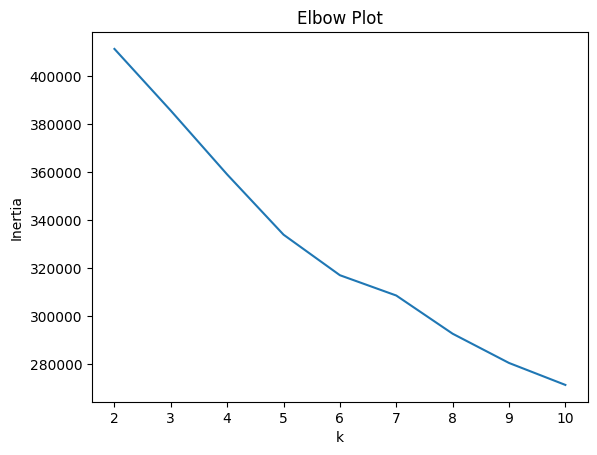

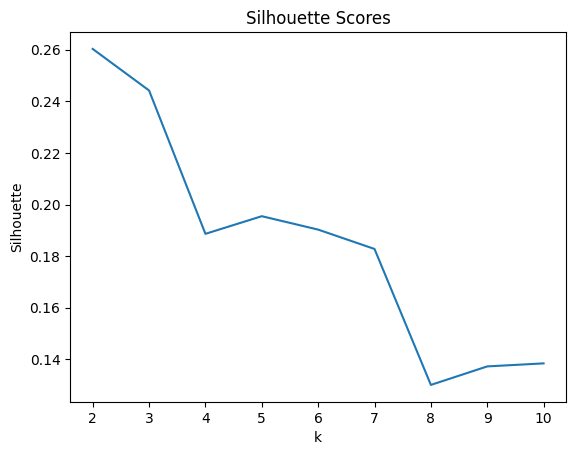

Optimal k: 2


In [ ]:
# Choose k via Elbow & Silhouette
Ks = list(range(2, 11))
inertias, sil_scores = [], []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

plt.figure()
plt.plot(Ks, inertias)
plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("Elbow Plot")
plt.show()

plt.figure()
plt.plot(Ks, sil_scores)
plt.xlabel("k"); plt.ylabel("Silhouette"); plt.title("Silhouette Scores")
plt.show()

opt_k = Ks[sil_scores.index(max(sil_scores))]
print("Optimal k:", opt_k)

Your PCA 80% run gives you a much higher silhouette overall—so:

k=2: silhouette ≈ 0.26 (best), but only two huge clusters.

k=3: silhouette ≈ 0.25 (2nd best) and splits your corpus into three groups.

k=4–6: silhouette dips into the 0.19–0.20 range, but inertia keeps dropping (see elbow around 5).

In [ ]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_
print("Cluster sizes:\n", df["cluster"].value_counts())

Cluster sizes:
 cluster
1    4929
4    2617
3    1981
2     902
0     259
Name: count, dtype: int64


In [ ]:
with open("paper_pipeline.pkl", "wb") as f:
    pickle.dump({"df": df, "embeddings": embeddings, "pca": pca, "kmeans": kmeans}, f)
print("Saved state to paper_pipeline.pkl")

Saved state to paper_pipeline.pkl


In [ ]:
centroid_idxs = []

for c, centroid in enumerate(kmeans.cluster_centers_):
    sims = cosine_similarity(centroid.reshape(1, -1), X_pca)[0]
    idx = sims.argmax()
    centroid_idxs.append(idx)

    row = df.iloc[idx]
    title    = row["title"]
    path     = row["file_path"]
    abstract = row["abstract"] or "No abstract available"
    snippet  = abstract[:200] + ("…" if len(abstract) > 200 else "")

    print(f"Cluster {c} centroid paper:")
    print(f" • Title   : {title}")
    print(f" • File    : {path}")
    print(f" • Abstract: {snippet}\n")


Cluster 0 centroid paper:
 • Title   : ijmpc
 • File    : /content/drive/MyDrive/CSCE670 DATASET/arxiv_source1/cond-mat/9804036v2/ijmpc.tex
 • Abstract: No abstract available

Cluster 1 centroid paper:
 • Title   : Plastic flow of persistent currents in two dimensional strongly 
interacting systems
 • File    : /content/drive/MyDrive/CSCE670 DATASET/arxiv_source1/cond-mat/9804204v1/curmap.tex
 • Abstract: The local persistent current in two dimensional strongly 
interacting systems is investigated. As the interaction strength is enhanced
the current in the sample undergoes a transition from diffusive t…

Cluster 2 centroid paper:
 • Title   : ghyo4
 • File    : /content/drive/MyDrive/CSCE670 DATASET/arxiv_source1/math/9801083v1/ghyo4.tex
 • Abstract: No abstract available

Cluster 3 centroid paper:
 • Title   : din
 • File    : /content/drive/MyDrive/CSCE670 DATASET/arxiv_source1/q-alg/9611030v2/din.tex
 • Abstract: No abstract available

Cluster 4 centroid paper:
 • Title   : kmrwextd

WE SHOULD GENERATE LABELS FROM THESE CENTROIDS AS OUR 'GENERAL LABELS' AND REFINE PAPER BY PAPER BY ALSO INCLUDING THE GENERAL LABELS

In [ ]:
def recommend(title, top_n=5):
    idxs = df.index[df["title"] == title].tolist()
    if not idxs:
        raise ValueError(f"Title '{title}' not found")
    idx = idxs[0]
    emb = embeddings[idx].reshape(1, -1)
    cluster_idxs = df.index[df["cluster"] == df.at[idx, "cluster"]].tolist()
    sims = cosine_similarity(emb, X[cluster_idxs])[0]
    ranked = sorted(zip(cluster_idxs, sims), key=lambda x: -x[1])
    return [(df.at[i, "title"], float(score)) for i, score in ranked if i != idx][:top_n]


In [ ]:
print("Sample paper:", df.at[3012, "title"])
print("Top 5 recommendations:", recommend(df.at[3012, "title"]))

Sample paper: Decoherence and the Thouless Crossover in One-Dimensional Conductors
Top 5 recommendations: [('Intrinsic Decoherence in Mesoscopic Systems', 0.9735082387924194), ('\\bf {Conductance Quantization in a Periodically\nModulated Quantum Channel: backscattering and mode mixing', 0.9694964289665222), ('Reentrant behavior in the superconducting phase-dependent resistance\\\\\nof a disordered two-dimensional electron gas', 0.9675053358078003), ('Quasiparticles in the Vortex State of Dirty $d$-Wave Superconductors', 0.9674484729766846), ('Asymptotics of Universal Probability of Neighboring Level Spacings\\protect\\\\\nat the Anderson Transition', 0.9671379923820496)]


DO NOT TOUCH ABOVE, IGNORE EVERYTHING BELOW

In [ ]:
# Install HDBSCAN (run once)
!pip install hdbscan

import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Fit HDBSCAN on your PCA embeddings
clusterer = hdbscan.HDBSCAN(min_cluster_size=30,    # tweak this
                            metric='euclidean',
                            cluster_selection_method='eom')
labels_hdb = clusterer.fit_predict(X_pca)

# Add to your DataFrame
df['hdbscan_cluster'] = labels_hdb

# Evaluate
print("HDBSCAN silhouette:", silhouette_score(X_pca, labels_hdb))
print("HDBSCAN DB       :", davies_bouldin_score(X_pca, labels_hdb))

# Sample a few clusters
for c in sorted(set(labels_hdb)):
    if c < 0:   # noise
        continue
    print(f"\nHDBSCAN cluster {c} sample titles:")
    print(df[df['hdbscan_cluster']==c]['title'].sample(5, random_state=42).tolist())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN silhouette: 0.05009051
HDBSCAN DB       : 2.9514338604787747

HDBSCAN cluster 0 sample titles:
['imsmark', 'imsmark', 'imsmark', 'imsmark', 'imsmark']

HDBSCAN cluster 1 sample titles:
['rem_2d', 'fig2', 'fig3', 'diff2d', 'figure5a']

HDBSCAN cluster 2 sample titles:
['9502010', 'sect1', 'Query Optimization: An Exercise in Utility \\ \\ $:\\!-)$', 'Phonon Assisted Multimagnon Optical Absorption\nand Long Lived Two-Magnon States in Undoped Lamellar\nCopper Oxides. supr-con/9501001', 'statmech_bose_app']

HDBSCAN cluster 3 sample titles:
['An Efficient Distribution of Labor in a Two Stage Robust Interpretation\nProcess', 'Incremental Parser Generation for Tree Adjoining\n  Grammars\\thanks{Thanks to Dania Egedi, Aravind Joshi, B. Srinivas\n    and the student session reviewers.', 'conj', 'p_experiments', '\\vspace{-0.5in']


In [ ]:
from sklearn.decomposition import PCA

for var in [0.80, 0.90, 0.95, 0.99]:
    pca = PCA(n_components=var, random_state=42)
    Xp = pca.fit_transform(X)   # X is your full embedding matrix
    km = KMeans(n_clusters=6, random_state=42).fit(Xp)
    labels = km.labels_
    sil = silhouette_score(Xp, labels)
    db  = davies_bouldin_score(Xp, labels)
    print(f"PCA var={var:.2f} → silhouette={sil:.3f}, DB={db:.3f}")


PCA var=0.80 → silhouette=0.190, DB=1.878
PCA var=0.90 → silhouette=0.172, DB=2.111
PCA var=0.95 → silhouette=0.155, DB=2.146
PCA var=0.99 → silhouette=0.131, DB=2.453
